<a href="https://colab.research.google.com/github/bibersay/Deep-Project/blob/main/CNN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
is_cuda = torch.cuda.is_available()
device = torch.device("cuda" if is_cuda else "cpu")
print('current device : ',device)

current device :  cuda


In [ ]:
batch_size = 50
epoch_num = 15
learning_rate = 10e-4

In [ ]:
train_data = datasets.MNIST(root='./data',train = True, transform = transforms.ToTensor(),
                            download=True)
test_data = datasets.MNIST(root='./data',train = False, transform = transforms.ToTensor(),
download=True)

print(train_data)
print(test_data)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


<class 'torch.Tensor'> torch.Size([1, 28, 28])
<built-in method size of Tensor object at 0x7fa86a7c5650>


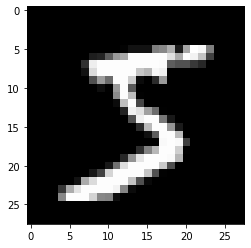

In [ ]:
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap='gray')
print(type(image),image.shape)
print(image.squeeze().size)
# print(image.squeeze())
plt.show()

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                           batch_size = batch_size,
                                           shuffle= True)               #시계열 데이터 외에는 shuffle 사용 
test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                          batch_size = batch_size,
                                          shuffle= True)

first_batch = train_loader.__iter__().__next__()
print(first_batch)
print(first_batch[0])
print(first_batch[1])

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1,32,3,1)        #input, output, kernel_size, stride
        self.conv2 = nn.Conv2d(32,64,3,1)
        self.dropout1 = nn.Dropout2d(.25)
        self.dropout2 = nn.Dropout2d(.5)
        self.fc1 = nn.Linear(9216,128)          #input, output
        self.fc2 = nn.Linear(128,10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x) 
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = self.dropout1(x)
        x = torch.flatten(x,1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
model.train()
i = 0
for epoch in range(epoch_num):
    for data, target in train_loader :
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if i %1000 == 0:
            print(f'train step : {i}    loss{loss.item():.3f}')
        i+=1

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


train step : 0    loss2.314
train step : 1000    loss0.034
train step : 2000    loss0.108
train step : 3000    loss0.266
train step : 4000    loss0.108
train step : 5000    loss0.004
train step : 6000    loss0.028
train step : 7000    loss0.011
train step : 8000    loss0.033
train step : 9000    loss0.032
train step : 10000    loss0.002
train step : 11000    loss0.036
train step : 12000    loss0.001
train step : 13000    loss0.002
train step : 14000    loss0.011
train step : 15000    loss0.009
train step : 16000    loss0.001
train step : 17000    loss0.011


In [ ]:
model.eval()
correct = 0
for data, target in test_loader:
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    prediction = output.data.max(1)[1]
    correct += prediction.eq(target.data).sum()

print('test accuracy : {:.2f}'.format(100*correct / len(test_loader.dataset)))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


test accuracy : 99.08


In [ ]:
output.data

tensor([[-2.5888e+01, -2.6625e+01, -2.4174e+01, -2.5625e+01, -1.5837e+01,
         -2.1678e+01, -3.5413e+01, -1.5938e+01, -2.0025e+01, -2.3842e-07],
        [-2.8779e+01, -1.3873e+01, -9.7377e+00, -1.2449e+01, -2.5850e+01,
         -2.7347e+01, -3.5853e+01, -6.4252e-05, -1.5359e+01, -1.6021e+01],
        [-3.3775e+01, -3.4531e+01, -3.2704e+01, -5.0067e+01,  0.0000e+00,
         -4.2995e+01, -2.9057e+01, -3.9063e+01, -3.8051e+01, -2.4823e+01],
        [-3.5995e+01, -2.8840e+01, -4.4172e+01, -1.9300e+01, -2.8550e+01,
          0.0000e+00, -2.7445e+01, -3.3471e+01, -2.3613e+01, -1.7347e+01],
        [-3.8698e+01, -3.3273e+01, -3.6674e+01, -3.0350e+01, -1.5922e+01,
         -2.5666e+01, -4.6507e+01, -2.3501e+01, -2.4085e+01, -1.1921e-07],
        [-2.2390e+01,  0.0000e+00, -2.0625e+01, -2.8180e+01, -2.1966e+01,
         -2.4783e+01, -2.3235e+01, -2.2050e+01, -2.0538e+01, -2.9509e+01],
        [-3.6393e+01, -3.6756e+01, -4.4256e+01, -2.0239e+01, -3.1213e+01,
          0.0000e+00, -2.3763e+0